# Quantitative omics 
The exercises of this notebook correspond to different steps of the data analysis of quantitative omics data. We use data from transcriptomics and proteomics experiments.


## Installation of libraries and necessary software

Copy the files *me_bestprobes.csv* and _AllQuantProteinsInAllSamples.csv_ into the folder that contains this jupyter notebook or upload them to http://localhost:8888/tree


Install the necessary libraries (only needed once) by executing (shift-enter) the following cell:


In [15]:
install.packages("DAAG", repos='http://cran.us.r-project.org')
install.packages("MASS", repos='http://cran.us.r-project.org')
install.packages("matrixStats", repos='http://cran.us.r-project.org')
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager", repos='http://cran.us.r-project.org')
BiocManager::install(c("Biobase","preprocessCore","qvalue","limma"))


The downloaded binary packages are in
	/var/folders/77/f9sm93v10k3_wzqf0868lmvw0000gn/T//RtmpMtlxn4/downloaded_packages

  有二进制版本的，但源代码版本是后来的:
     binary source needs_compilation
MASS 7.3-56 7.3-57              TRUE



安装源码包‘MASS’





The downloaded binary packages are in
	/var/folders/77/f9sm93v10k3_wzqf0868lmvw0000gn/T//RtmpMtlxn4/downloaded_packages


'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'Biobase' 'qvalue' 'limma'”
Installing package(s) 'preprocessCore'

Warning message in .inet_warning(msg):
“unable to access index for repository https://bioconductor.org/packages/3.14/bioc/bin/macosx/big-sur-arm64/contrib/4.1:
  无法打开URL'https://bioconductor.org/packages/3.14/bioc/bin/macosx/big-sur-arm64/contrib/4.1/PACKAGES'”
Warning message in .inet_warning(msg):
“unable to access index for repository https://bioconductor.org/packages/3.14/data/annotation/bin/macosx/big-sur-arm64/contrib/4.1:
  无法打开URL'https://bioconductor.org/packages/3.14/data/annotation/bin/macosx/big-sur-arm64/contrib/4.1/PACKAGES'”
Warning message in .inet_warning(msg):


## Loading data and libraries
This requires that the installation above have been finished without error

In [22]:
library("MASS")
library("DAAG")
library("matrixStats")
library("Biobase")

library("qvalue")
library("limma")

me_Kalinka <- read.csv("me_bestprobes.csv",row.names=1)
CanceriTRAQ <- read.csv("AllQuantProteinsInAllSamples.csv",row.names=1)

### Exercise 1

We apply different ways of normalization to a typical microarray data set. 

Get the data ```geneData``` from the ```Biobase``` package. Normalize the columns (by division on normal scale or subtraction on log-scale) by a) mean, b) median, c) mean of log-values, and d) median of log-values. Revise the results extensively by comparing the multiple distributions in histograms, density plots, ranked plots and ```qqnorm```. Do also a direct comparison between replicates by scatter plots.




,A,B,C,D,E,F,G,H,I,J,⋯,Q,R,S,T,U,V,W,X,Y,Z
AFFX-MurIL2_at,192.7420,85.75330,176.7570,135.57500,64.49390,76.35690,160.5050,65.96310,56.90390,135.608000,⋯,179.84500,152.46700,180.83400,85.41460,157.9890,146.8000,93.8829,103.85500,64.4340,175.61500
AFFX-MurIL10_at,97.1370,126.19600,77.9216,93.37130,24.39860,85.50880,98.9086,81.69320,97.80150,90.483800,⋯,87.68060,108.03200,134.26300,91.40310,NA,85.0212,79.2998,71.65520,64.2369,78.70680
AFFX-MurIL4_at,45.8192,8.83135,33.0632,28.70720,5.94492,28.29250,30.9694,14.79230,14.23990,34.487400,⋯,32.79110,33.52920,19.81720,20.41900,26.8720,31.1488,22.3420,19.01350,12.1686,17.37800
AFFX-MurFAS_at,22.5445,3.60093,14.6883,12.33970,36.86630,11.25680,23.0034,16.21340,12.03750,4.549780,⋯,15.94880,14.67530,NA,12.88750,11.9186,12.8324,11.1390,7.55564,19.9849,8.96849
AFFX-BioB-5_at,96.7875,30.43800,46.1271,70.93190,56.17440,42.67560,86.5156,30.79270,19.71830,46.352000,⋯,58.62390,114.06200,93.44020,22.51680,48.6462,90.2215,42.0053,57.57380,44.8216,61.70440
AFFX-BioB-M_at,89.0730,25.84610,57.2033,69.97660,49.58220,26.12620,75.0083,42.33520,41.12070,91.530700,⋯,58.13310,104.12200,115.83100,58.12240,73.4221,64.6066,40.3068,41.82090,46.1087,49.41220
AFFX-BioB-3_at,265.9640,181.08000,164.9260,161.46900,236.97600,156.80300,211.2570,235.99400,175.64000,229.671000,⋯,192.22100,305.56700,300.68900,146.08100,142.9130,187.1320,170.5830,133.27900,187.4070,144.78400
AFFX-BioC-5_at,110.1360,57.28890,67.3980,77.22070,41.34880,37.97800,110.5510,47.76900,24.78750,66.730200,⋯,53.27110,107.23700,119.66600,24.06540,98.8425,92.0846,53.3866,52.01640,65.9154,75.00430
AFFX-BioC-3_at,43.0794,16.80060,37.6002,46.52720,22.24750,61.64010,33.6623,31.44230,23.10080,39.741900,⋯,57.50780,41.13370,79.98290,23.49530,51.5609,48.1247,31.8358,29.92640,37.8611,60.47720
AFFX-BioDn-5_at,10.9187,16.17890,10.1495,9.73639,16.90280,5.33328,25.1182,38.75760,31.40410,0.398779,⋯,21.50910,3.10536,5.95347,5.66012,52.9338,15.7267,15.2116,NA,13.1884,10.03850


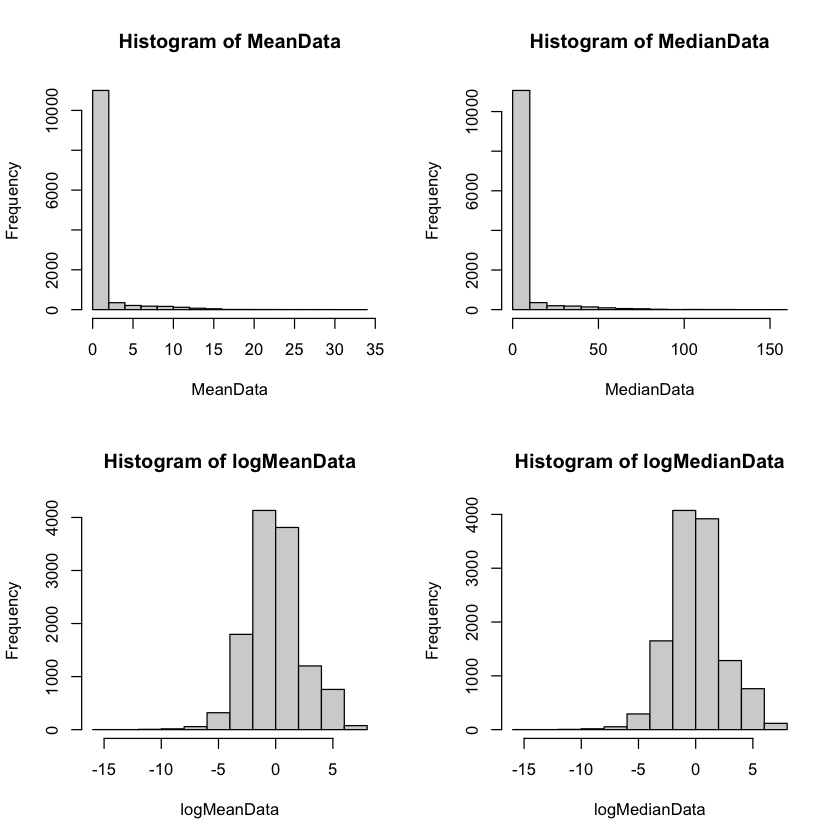

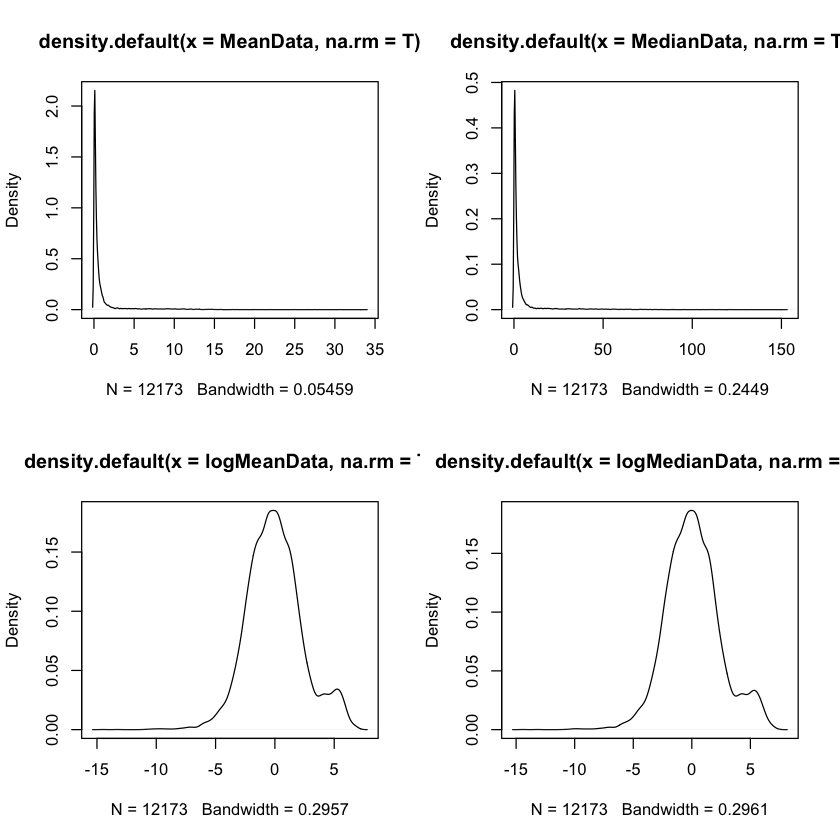

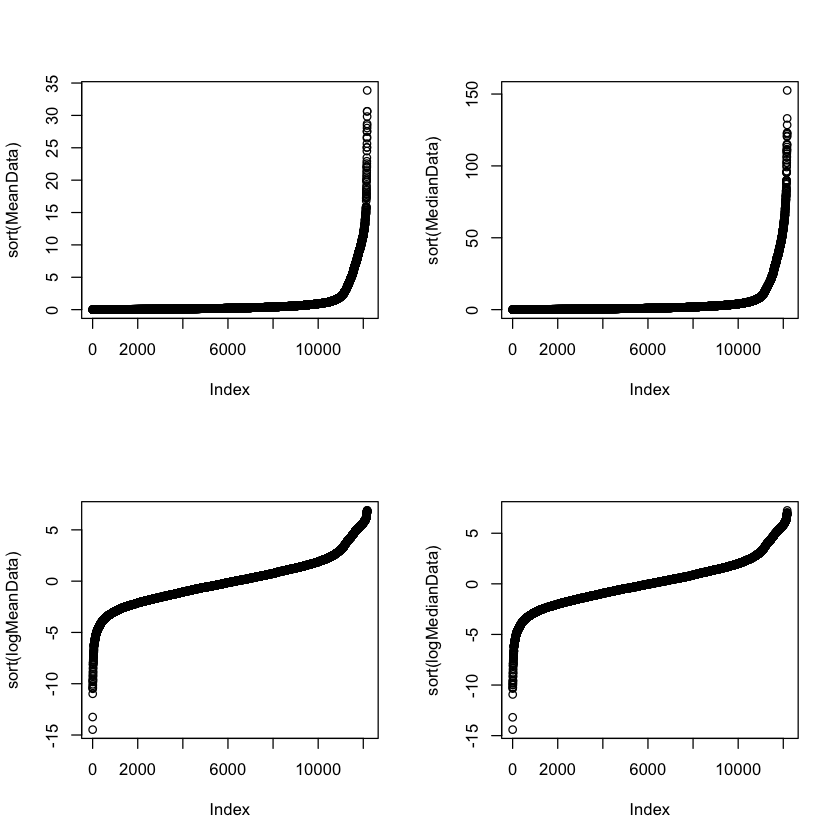

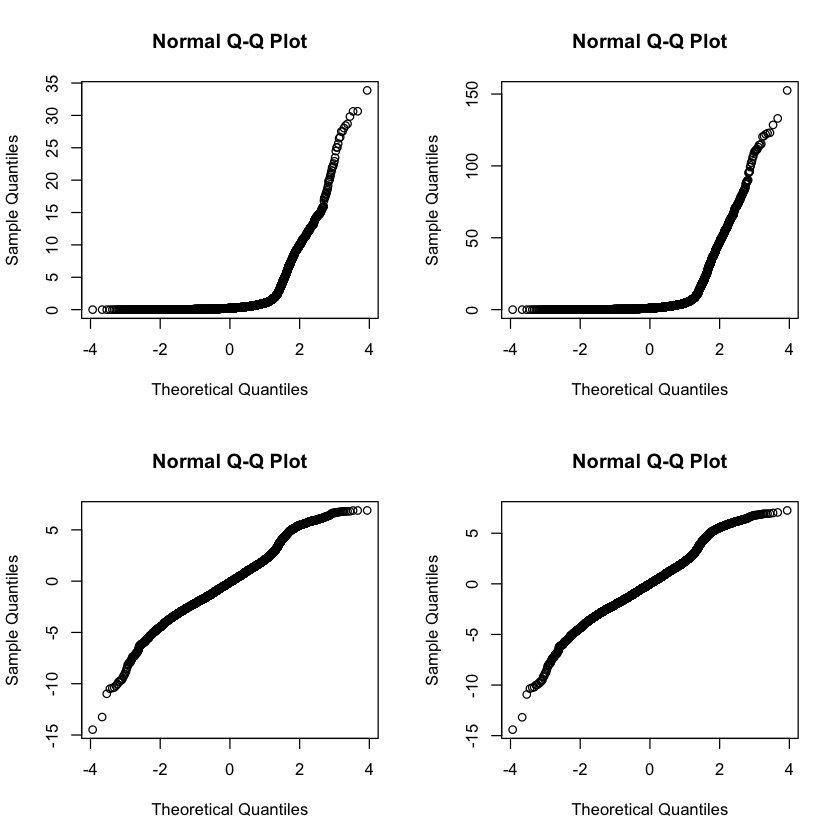

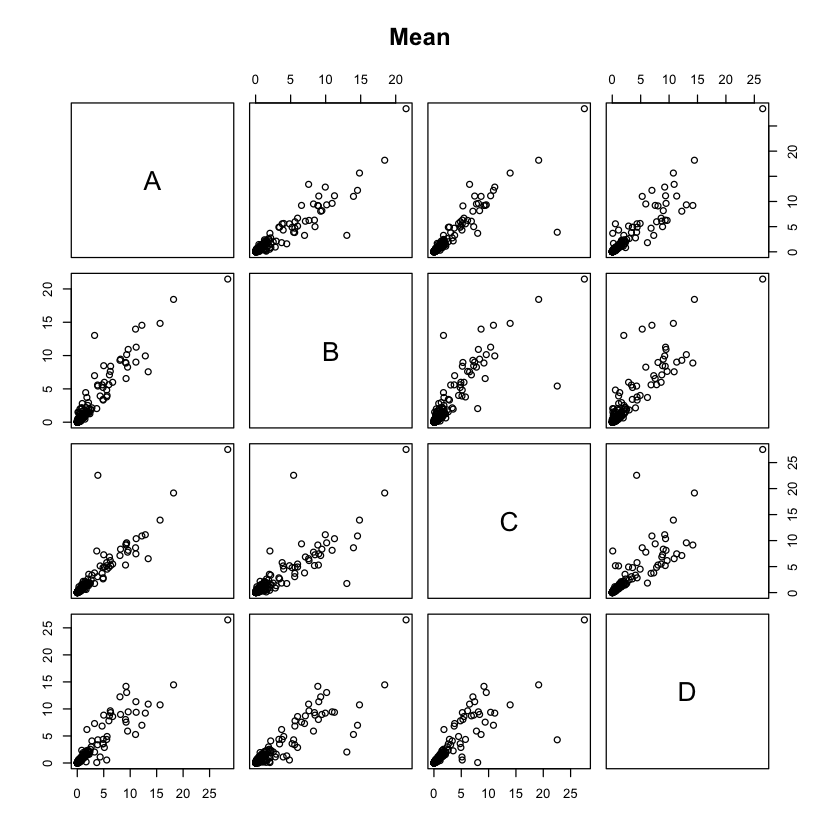

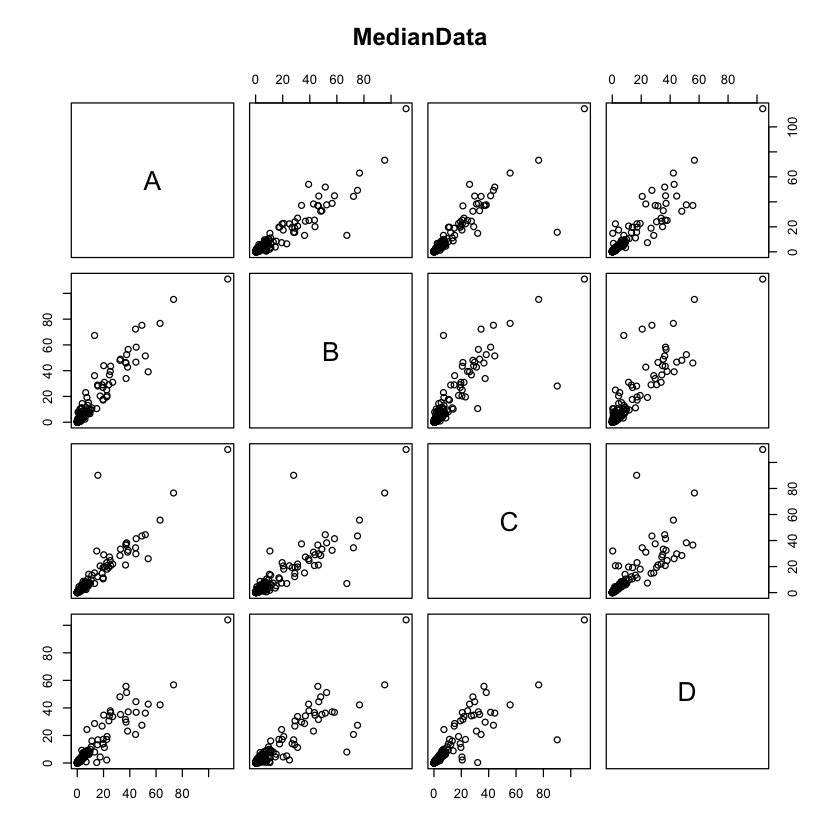

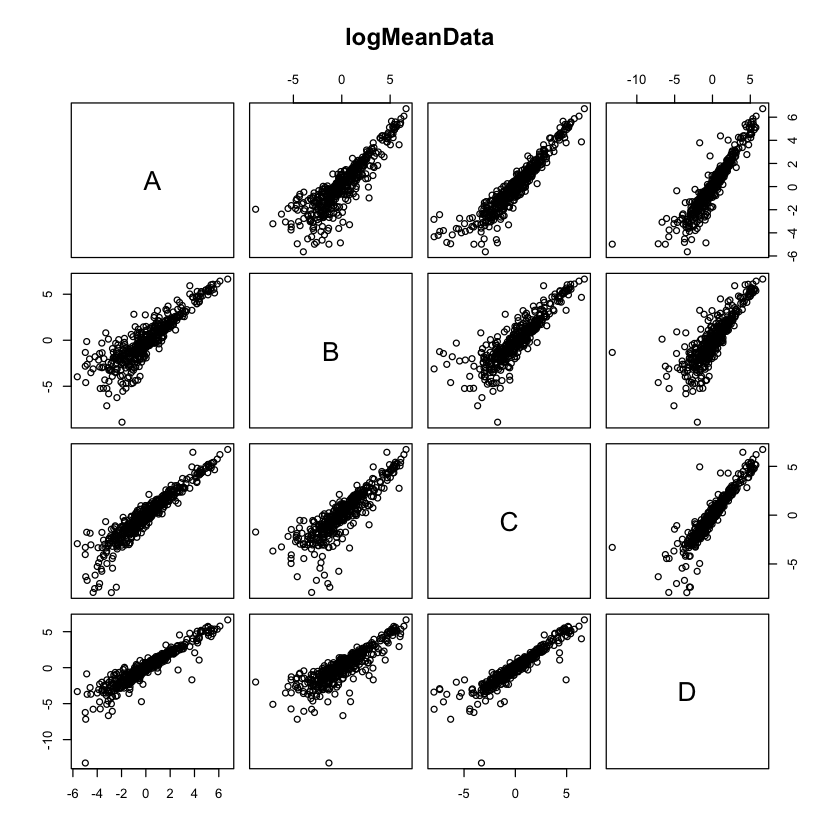

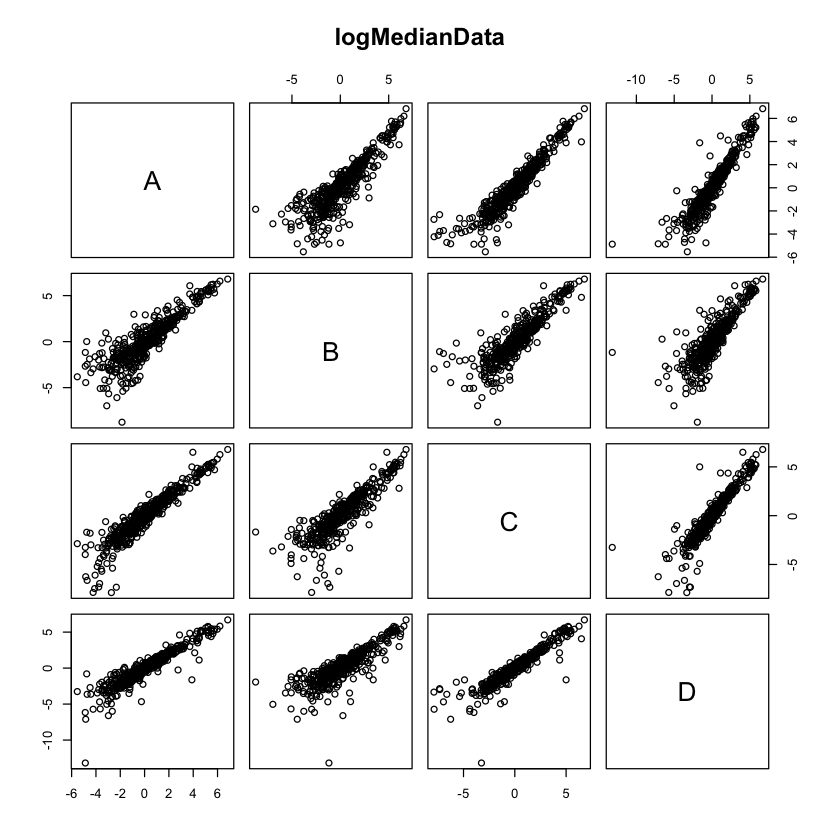

In [23]:
data(geneData)
geneData[geneData<=0] <- NA
geneData
logDat <- log2(geneData)

#a) mean
MeanData = t(t(geneData) / colMeans(geneData, na.rm=T))

#b) median
MedianData = t(t(geneData) / colMedians(geneData, na.rm=T))

#c) mean of log-values
logMeanData = t(t(logDat) - colMeans(logDat, na.rm=T))

#d) median of log-values
logMedianData = t(t(logDat) - colMedians(logDat,na.rm=T))
                 
#hist
par(mfrow=c(2,2))
hist(MeanData)
hist(MedianData)                 
hist(logMeanData)
hist(logMedianData)

#density plots
par(mfrow=c(2,2))
plot(density(MeanData,na.rm=T))
plot(density(MedianData,na.rm=T))
plot(density(logMeanData,na.rm=T))
plot(density(logMedianData,na.rm=T))

#ranked plots
par(mfrow=c(2,2))
plot(sort(MeanData))
plot(sort(MedianData))
plot(sort(logMeanData))
plot(sort(logMedianData))

#qqnorm
par(mfrow=c(2,2))
qqnorm(MeanData)
qqnorm(MedianData)
qqnorm(logMeanData)
qqnorm(logMedianData)

#Do also a direct comparison between replicates by scatter plots.
par(mfrow=c(1,4))
pairs(~A+B+C+D, data=MeanData, main="Mean")
pairs(~A+B+C+D, data=MedianData, main="MedianData")
pairs(~A+B+C+D, data=logMeanData, main="logMeanData")
pairs(~A+B+C+D, data=logMedianData, main="logMedianData")

##### Question I:  <u>Would you plot the data on log-scale or on normal scale?</u>

_log-scale._

##### Question II:  <u>What does qqnorm tell us?</u>

_on log-scale the qqnorm plot is a linear trend, indicating that the data is nearly a normal distribution._

##### Question III:  <u>What is the problem when normalizing by the mean on normal scale?</u>

_The data will more depend on the Outliers._

##### Question IV:  <u>What is the difference between normalization b) and d)?</u>

_d) is transfer to on the log-scale._



### Exercise 2

Here, we will determine differentially regulated genes from the comparison between different sample groups of geneData. 

a) Take the log-transformed ```geneData``` set and perform t-tests for all genes between sample groups (B, I, K, N, P, T) and (C, G, J, O, R, U, V). You can copy and modifiy the code from the lecture. Do not forget to correct for multiple testing. Plot a histogram of the p-values and generate a volcano plot.

b) In order to see whether the t-tests also provide results for any comparison, take randomly chosen samples of 6 versus 6 groups and redo the statistical tests.

c) Carry out a principal component analysis on the entire data set and look for the groups that you tested for significantly different genes (loading plot) in a).


[1] "p-value below 0.01: 63"

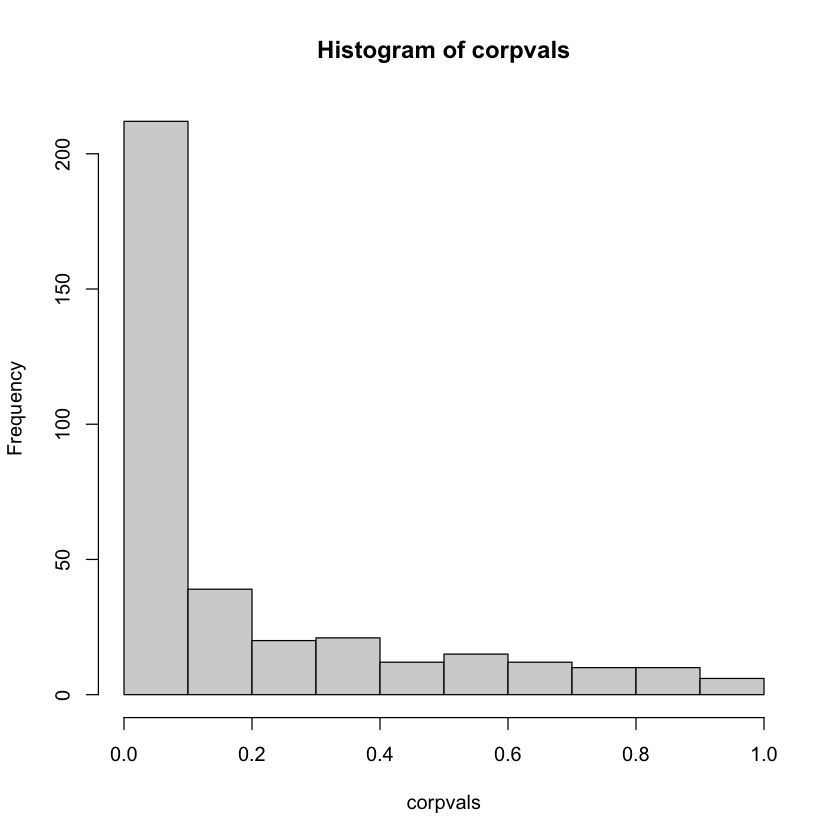

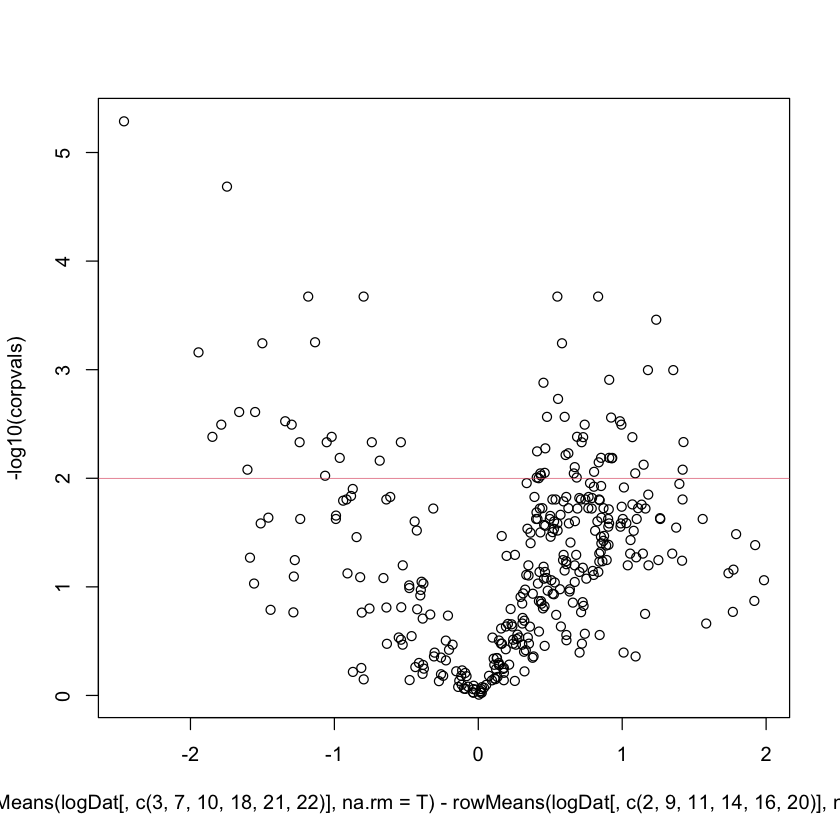

[1] "p-value below 0.01: 0"

Importance of components:
                          Comp.1     Comp.2     Comp.3      Comp.4      Comp.5
Standard deviation     4.8625602 0.66162504 0.55244692 0.473918201 0.432303162
Proportion of Variance 0.9094035 0.01683645 0.01173837 0.008638402 0.007187924
Cumulative Proportion  0.9094035 0.92623998 0.93797835 0.946616748 0.953804672
                            Comp.6      Comp.7      Comp.8      Comp.9
Standard deviation     0.382612221 0.355302090 0.315442540 0.300855617
Proportion of Variance 0.005630466 0.004855368 0.003827077 0.003481312
Cumulative Proportion  0.959435138 0.964290506 0.968117583 0.971598895
                           Comp.10     Comp.11     Comp.12     Comp.13
Standard deviation     0.278082974 0.264809142 0.248743121 0.243514192
Proportion of Variance 0.002974236 0.002697072 0.002379736 0.002280737
Cumulative Proportion  0.974573131 0.977270203 0.979649939 0.981930676
                           Comp.14     Comp.15     Comp.16     Comp.17
Standard deviation 

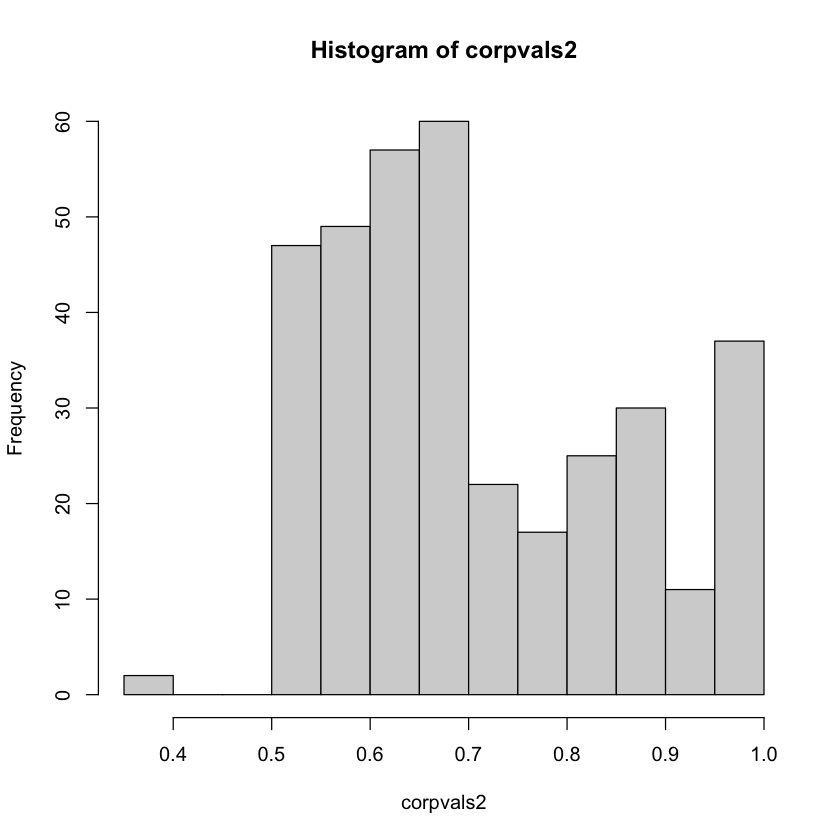

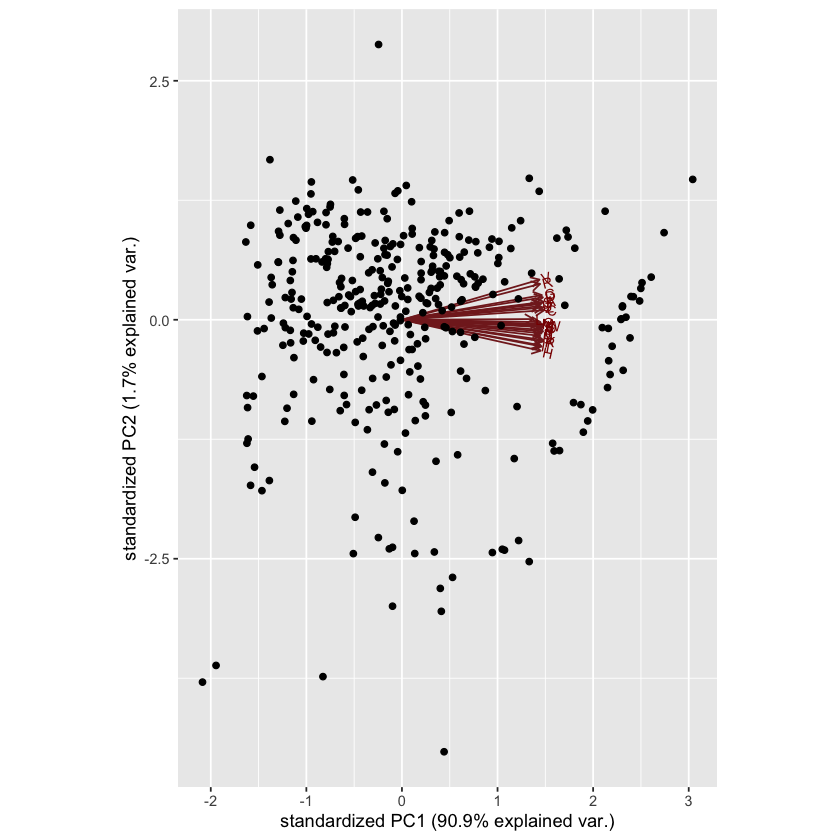

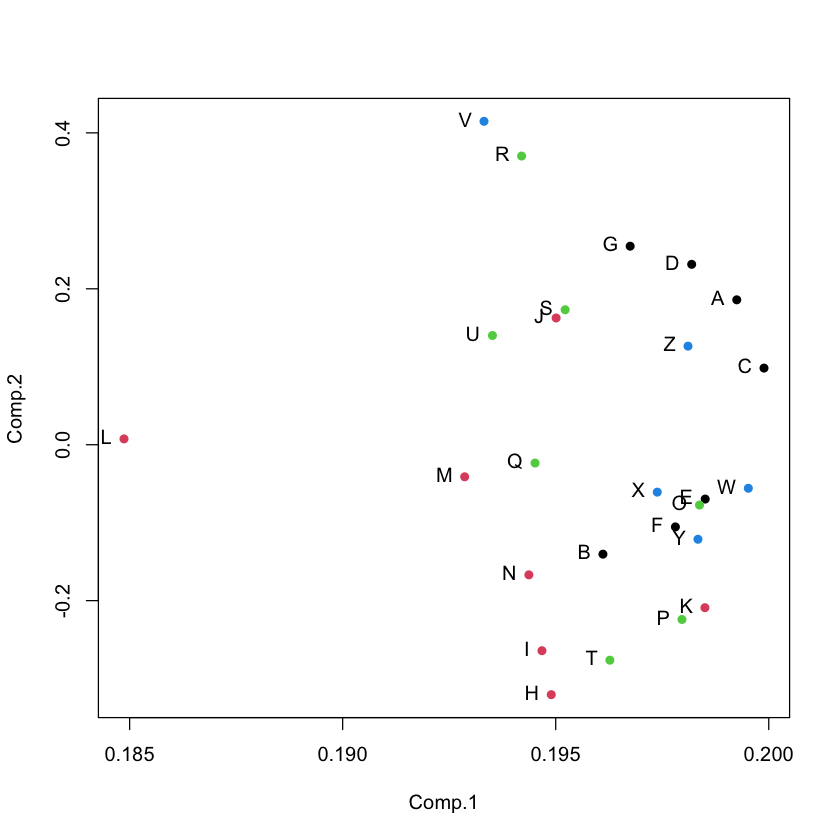

In [25]:
geneData[geneData<=0] <- NA
logDat <- log2(geneData)
logDat <- logDat[complete.cases(logDat),]

##a)
pvals <- vector(,nrow(logDat))

#sample groups (B, I, K, N, P, T) and (C, G, J, O, R, U, V).
sample_1 <- as.matrix(logDat[,c(2,9,11,14,16,20)])
sample_2 <- as.matrix(logDat[,c(3,7,10,18,21,22)])

for(i in 1:nrow(logDat)) {
  pvals[i] <- t.test(sample_1[i,],sample_2[i,])$p.value
}

#correct for multiple testing. 
corpvals <- p.adjust(pvals,method="BH")
hist(corpvals)
paste("p-value below 0.01:",sum(corpvals < 0.01))

#volcano plot.
plot(rowMeans(logDat[, c(3,7,10,18,21,22)], na.rm=T) - rowMeans(logDat[,c(2,9,11,14,16,20)], na.rm=T) , -log10(corpvals))
abline(h = -log10(0.01),col=2,lwd=0.5)

##b)
pvals2 <- vector(,nrow(logDat))
sample_3 <- as.matrix(logDat[,c(1,2,3,4,5,6)])
sample_4 <- as.matrix(logDat[,c(11,12,13,14,15,16)])

for(i in 1:nrow(logDat)) {
  pvals2[i] <- t.test(sample_3[i,],sample_4[i,])$p.value
}
corpvals2 <- p.adjust(pvals2,method="BH")
hist(corpvals2)
paste("p-value below 0.01:",sum(corpvals2 < 0.01))

##c)
data.pca <- princomp(logDat, cor = TRUE)
summary(data.pca)
library(ggbiplot)
ggbiplot(data.pca)

plot(data.pca$loadings,col=rep(1:4,each=7),pch=16)
text(data.pca$loadings,colnames(logDat),pos=2)

##### Question I:  <u>How many differentially regulated genes do you find in a) and in b) (p-value below 0.01)?</u>

_63;0_

##### Question II:  <u>Why does a volcano plot look like a volcano?</u>

_A volcano plot is constructed by plotting the negative log of the p-value on the y-axis (usually base 10). This results in data points with low p-values
(highly significant) appearing toward the top of the plot. The x-axis displays the fold-change between the two conditions; this is plotted as the log of the
fold-change so that changes in both directions appear equidistant from the centre. Data sets plotted in this way often resemble an erupting volcano._

##### Question III:  <u>What does the PCA tell you about part a) of this exercise?</u>

_The loading plot is used to show the correlation of the data, the data with higher correlation are clustered together. In the loading plot, it is observed
that the first group (B, I, K, N, P, T) in a) is distributed here, indicating that these columns of data are strongly correlated with each other, while the
second group (C, G, J, R, U, V) are distributed here, indicating that the correlation between the first group and the second group is not high. In a) I did
identify 63 differentially expressed genes._



### Exercise 3

In bottom-up LC-MS experiments, the output are peptides which can be shared between different proteins. This is why the results most of the time report protein groups instead of single proteins. Here, you will apply different operations on the reported protein groups. 

Read the file _Example.csv_ and extract the column with the protein accession numbers. 

a) Pick out one of the values and apply ```strsplit``` to separate database name (e.g. TREMBL, SWISS-PROT) from accession id.

b) Take a value with multiple protein accessions and extract only the accession ids.

c) Operate ```strsplit``` on the entire column and try to extract the accession ids.

d) Count the number of proteins per protein group and plot their distribution as histogram.


Sequence,Protein.Accessions,X..Proteins,X..Protein.Groups,Activation.Type,Modifications,IonScore,Exp.Value,Δ.Score,Rank,⋯,m.z..Da.,MH...Da.,ΔM..ppm.,RT..min.,First.Scan,Last.Scan,MS.Order,Ions.Matched,Spectrum.File,Annotation
<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<lgl>
aAAHHYGAQcDk,IPI00557327.1,2,1,CID,"N-Term(iTRAQ4plex), C10(Methylthio), K12(iTRAQ4plex)",37,0.00899,1.00,1,⋯,535.9198,1605.7449,-3.50,42.64,3476,3476,MS2,12/01/94,Obb05178.RAW,NA
aAAHHYGAQcDk,IPI00557327.1,2,1,CID,"N-Term(iTRAQ4plex), C10(Methylthio), K12(iTRAQ4plex)",57,0.00010,1.00,1,⋯,803.3785,1605.7498,-0.41,42.77,3494,3494,MS2,10/01/94,Obb05178.RAW,NA
aAAHHYGAQcDk,IPI00557327.1,2,1,HCD,"N-Term(iTRAQ4plex), C10(Methylthio), K12(iTRAQ4plex)",32,0.02709,1.00,1,⋯,535.9198,1605.7449,-3.50,42.64,3477,3477,MS2,05/01/94,Obb05178.RAW,NA
aAALEQFk,TREMBL:Q5BJZ3,2,1,CID,"N-Term(iTRAQ4plex), K8(iTRAQ4plex)",46,0.00282,0.76,1,⋯,583.3429,1165.6785,-2.96,65.18,6061,6061,MS2,07/01/60,Obb05176.RAW,NA
aAALEQFk,TREMBL:Q5BJZ3,2,1,CID,"N-Term(iTRAQ4plex), K8(iTRAQ4plex)",52,0.00068,0.75,1,⋯,583.3434,1165.6796,-2.02,65.20,6448,6448,MS2,07/01/60,Obb05177.RAW,NA
aAALEQFk,TREMBL:Q5BJZ3,2,1,CID,"N-Term(iTRAQ4plex), K8(iTRAQ4plex)",51,0.00090,0.75,1,⋯,583.3433,1165.6792,-2.33,65.07,6622,6622,MS2,07/01/60,Obb05178.RAW,NA
AAALEQFk,TREMBL:Q5BJZ3,2,1,CID,K8(iTRAQ4plex),51,0.00079,0.80,1,⋯,511.2940,1021.5808,0.87,60.24,5949,5949,MS2,06/01/60,Obb05178.RAW,NA
aAATLmTER,SWISS-PROT:P23562-2,2,1,CID,"N-Term(iTRAQ4plex), M6(Oxidation)",39,0.01480,1.00,1,⋯,562.2965,1123.5857,-3.64,45.39,3642,3642,MS2,08/01/72,Obb05176.RAW,NA
aAAVLPVLDLAQR,SWISS-PROT:P19234,1,1,CID,N-Term(iTRAQ4plex),54,0.00033,0.80,1,⋯,494.3028,1480.8939,-1.98,89.72,8861,8861,MS2,13/98,Obb05176.RAW,NA


[[1]]
[1] "TREMBL" "Q5BJX2"

[1] "P19234"

[1] "IPI00557327.1"
[1] "IPI00557327.1"
[1] "IPI00557327.1"
[1] "TREMBL" "Q5BJZ3"
[1] "TREMBL" "Q5BJZ3"
[1] "TREMBL" "Q5BJZ3"
[1] "TREMBL" "Q5BJZ3"
[1] "SWISS-PROT" "P23562-2"  
[1] "SWISS-PROT" "P19234"    
[1] "SWISS-PROT" "P19234"    
[1] "SWISS-PROT" "P19234"    
character(0)
[1] "SWISS-PROT" "Q68FX0"    
[1] "TREMBL" "Q5BJX2"
character(0)
[1] "IPI00231217.1"
[1] "IPI00213036.4"
[1] "ENSEMBL"            "ENSRNOP00000044081"
[1] "ENSEMBL"            "ENSRNOP00000044081"
character(0)
character(0)
character(0)
character(0)
character(0)
character(0)
character(0)
character(0)
character(0)
[1] "SWISS-PROT"         "P01946;ENSEMBL"     "ENSRNOP00000044081"
[1] "SWISS-PROT"         "P01946;ENSEMBL"     "ENSRNOP00000044081"
[1] "SWISS-PROT"         "P01946;ENSEMBL"     "ENSRNOP00000044081"
character(0)
character(0)
[1] "SWISS-PROT"         "P01946;ENSEMBL"     "ENSRNOP00000044081"
[1] "SWISS-PROT"         "P01946;ENSEMBL"     "ENSRNOP00000044081"
character(0)
character(0)
[1] "SWISS-PROT" "

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
[1] "Q5BJZ3"

[[5]]
[1] "Q5BJZ3"

[[6]]
[1] "Q5BJZ3"

[[7]]
[1] "Q5BJZ3"

[[8]]
[1] "P23562-2"

[[9]]
[1] "P19234"

[[10]]
[1] "P19234"

[[11]]
[1] "P19234"

[[12]]
NULL

[[13]]
[1] "Q68FX0"

[[14]]
[1] "Q5BJX2"

[[15]]
NULL

[[16]]
NULL

[[17]]
NULL

[[18]]
[1] "ENSRNOP00000044081"

[[19]]
[1] "ENSRNOP00000044081"

[[20]]
NULL

[[21]]
NULL

[[22]]
NULL

[[23]]
NULL

[[24]]
NULL

[[25]]
NULL

[[26]]
NULL

[[27]]
NULL

[[28]]
NULL

[[29]]
[1] "P01946"  "ENSEMBL"

[[30]]
[1] "P01946"  "ENSEMBL"

[[31]]
[1] "P01946"  "ENSEMBL"

[[32]]
NULL

[[33]]
NULL

[[34]]
[1] "P01946"  "ENSEMBL"

[[35]]
[1] "P01946"  "ENSEMBL"

[[36]]
NULL

[[37]]
NULL

[[38]]
[1] "P02770"

[[39]]
[1] "P02770"

[[40]]
[1] "P63031"

[[41]]
NULL

[[42]]
[1] "P62260"

[[43]]
[1] "Q920L2"

[[44]]
[1] "Q920L2"

[[45]]
[1] "ENSRNOP00000050213"

[[46]]
NULL

[[47]]
[1] "ENSRNOP00000050213"

[[48]]
[1] "Q5BJZ3"

[[49]]
NULL

[[50]]
[1] "Q5BJZ3"

[[51]]
NULL

[[52]]
NULL

[[53]]
[1] "Q8K4G6"

[[54]]
NULL

[[55]]
[1] "Q80UL1"

[[56]]
[1] "Q8VHF5"

[[57]]
[1] "ENSRNOP00000040306"

[[58]]
[1] "ENSRNOP00000016727"

[[59]]
NULL

[[60]]
NULL

[[61]]
NULL

[[62]]
NULL

[[63]]
[1] "P13437"        "IPI00948721.1"

[[64]]
NULL

[[65]]
NULL

[[66]]
NULL

[[67]]
[1] "P85972"

[[68]]
[1] "P16409"

[[69]]
NULL

[[70]]
[1] "P97850" "Q5VJM7" "Q63580" "Q7TMZ9" "Q7TN00" "Q9JJ49" "Q9Z1B6"

[[71]]
[1] "P97850" "Q5VJM7" "Q63580" "Q7TMZ9" "Q7TN00" "Q9JJ49" "Q9Z1B6"

[[72]]
[1] "ENSRNOP00000000474"

[[73]]
NULL

[[74]]
[1] "O55147" "O70180"

[[75]]
NULL

[[76]]
NULL

[[77]]
[1] "Q6P6R2"

[[78]]
[1] "Q5XIH7"

[[79]]
[1] "Q5XIH7"

[[80]]
[1] "Q5XIG1"

[[81]]
[1] "Q5XIG1"

[[82]]
[1] "Q5XIG1"

[[83]]
[1] "Q9Z327-3"

[[84]]
[1] "Q9Z327-3"

[[85]]
[1] "Q9Z327-3"

[[86]]
NULL

[[87]]
NULL

[[88]]
NULL

[[89]]
NULL

[[90]]
NULL

[[91]]
[1] "Q63638-1"

[[92]]
NULL

[[93]]
[1] "Q156J1" "Q5U2U8"

[[94]]
[1] "P50463"

[[95]]
[1] "P52296"

[[96]]
[1] "Q4PP99"

[[97]]
NULL

[[98]]
NULL

[[99]]
NULL

[[100]]
NULL

[[101]]
[1] "P02091"

[[102]]
NULL

[[103]]
[1] "P02091"        "IPI00951116.1"

[[104]]
[1] "P02091"        "IPI00951116.1"

[[105]]
[1] "P02091"

[[106]]
[1] "Q09073"

[[107]]
[1] "Q05962"

[[108]]
[1] "Q05962"

[[109]]
[1] "Q05962"

[[110]]
[1] "P01026"

[[111]]
[1] "P11762"

[[112]]
NULL

[[113]]
[1] "ENSRNOP00000024098"

[[114]]
[1] "B1H270" "Q499V7" "Q5EBA9" "Q68FT4"

[[115]]
[1] "B1H270" "Q499V7" "Q5EBA9" "Q68FT4"

[[116]]
[1] "Q62920"

[[117]]
NULL

[[118]]
NULL

[[119]]
[1] "Q63716"

[[120]]
NULL

[[121]]
[1] "Q63716"

[[122]]
[1] "P23693"

[[123]]
[1] "P23693"

[[124]]
[1] "P23693"

[[125]]
[1] "P23693"

[[126]]
[1] "P02564"     "SWISS-PROT"

[[127]]
[1] "P02564"     "SWISS-PROT"

[[128]]
[1] "P02564"     "SWISS-PROT"

[[129]]
[1] "P02564"     "SWISS-PROT"

[[130]]
[1] "P02564"     "SWISS-PROT"

[[131]]
[1] "P02564"     "SWISS-PROT"

[[132]]
[1] "P02564"     "SWISS-PROT"

[[133]]
[1] "P02564"     "SWISS-PROT"

[[134]]
NULL

[[135]]
NULL

[[136]]
NULL

[[137]]
[1] "ENSRNOP00000047596"

[[138]]
[1] "ENSRNOP00000047596"

[[139]]
[1] "ENSRNOP00000047596"

[[140]]
[1] "ENSRNOP00000047596"

[[141]]
[1] "ENSRNOP00000047596"

[[142]]
[1] "ENSRNOP00000047596"

[[143]]
[1] "ENSRNOP00000047596"

[[144]]
NULL

[[145]]
NULL

[[146]]
NULL

[[147]]
NULL

[[148]]
NULL

[[149]]
NULL

[[150]]
NULL

[[151]]
NULL

[[152]]
NULL

[[153]]
NULL

[[154]]
[1] "ENSRNOP00000030160"

[[155]]
[1] "Q64428"

[[156]]
[1] "Q64428"

[[157]]
[1] "Q4FZZ4"

[[158]]
NULL

[[159]]
[1] "P14046"

[[160]]
[1] "P36953"

[[161]]
[1] "P36953"

[[162]]
[1] "P48675"

[[163]]
[1] "P48675"

[[164]]
[1] "P48675"

[[165]]
[1] "P29117"

[[166]]
[1] "P10888"

[[167]]
[1] "Q63002"

[[168]]
NULL

[[169]]
[1] "P35565"

[[170]]
[1] "P35565"

[[171]]
NULL

[[172]]
NULL

[[173]]
[1] "Q63716"        "IPI00776546.2"

[[174]]
NULL

[[175]]
[1] "P97850" "Q5VJM7" "Q63580" "Q7TMZ9" "Q7TN00" "Q9JJ49" "Q9Z1B6"

[[176]]
[1] "P97850" "Q5VJM7" "Q63580" "Q7TMZ9" "Q7TN00" "Q9JJ49" "Q9Z1B6"

[[177]]
[1] "P97850" "Q

[1]  93 148 169  46  42   0  31

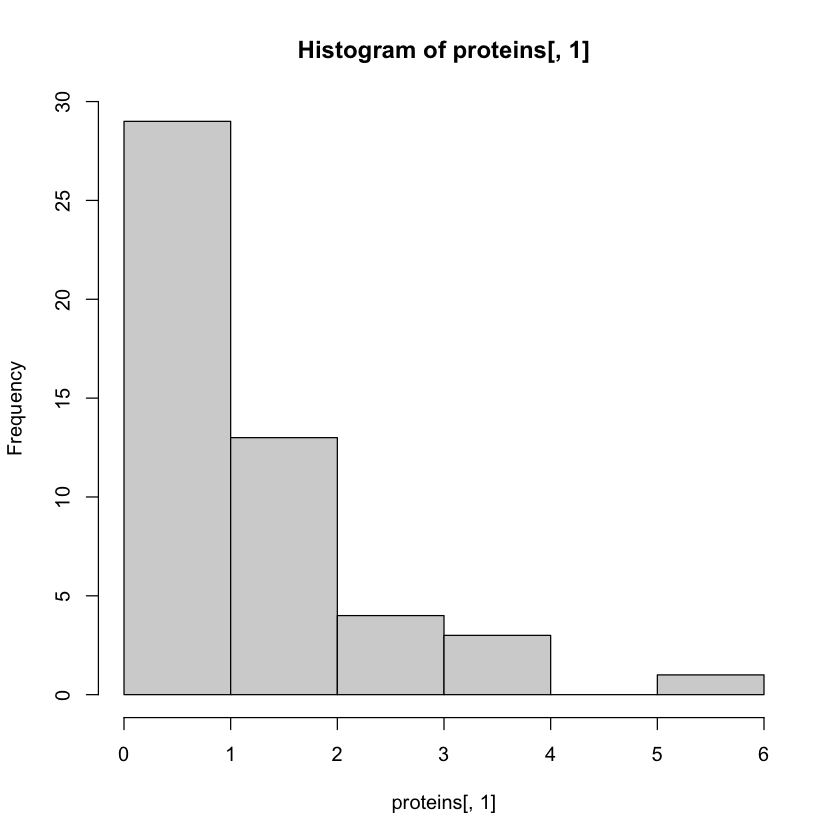

In [26]:
A <- read.csv("ExampleFile.csv")
A
protaccs <- A$Protein.Accessions

# a)
strsplit(as.character(protaccs[14]),":",fixed = T)
    
# b)
unlist(strsplit(strsplit(as.character(protaccs[10]),":",fixed = T)[[1]][2],";",fixed=T))
         
       
# c) Still some SWISS-PROT in the array though
allprots <- list()
for (i in 1:length(protaccs)) {
  str1 <- strsplit(as.character(protaccs[i]),":",fixed = T)
  print(str1[[1]])
  if (length(str1[[1]])>1)
    allprots[[i]] <- unlist(strsplit(str1[[1]][2],";",fixed=T))
}
allprots      
# d) This one is on you
proteins <- unique(cbind(A[,"X..Protein.Groups"],A[,"X..Proteins"]))
sumproteins = c(0,0,0,0,0,0,0)
for (j in 1:50){
    for (i in 1:7) {
        if (proteins[j,1]==i-1)
        sumproteins[i] = sumproteins[i]+proteins[j,2]
    }
}
sumproteins
hist(proteins[,1])

##### Question I:  <u>What is the difference between TREMBL and SWISS-PROT annotations?</u>

_Swiss-prot is an artificially annotated protein sequence database. It has the advantages of high annotation reliability and low redundancy.  
TrEMBL is a computer annotated protein sequence database. It contains all translation products of nucleic acid sequences encoded for proteins in EMBL nucleic acid sequence database. However, the database has low reliability and high redundancy. TrEMBL eliminated the sequences already included in the Swiss-prot database._

##### Question II:  <u>What is the advantage of measuring multiple peptides of a protein?</u>

_Because different proteins may contain the same peptide, measuring multiple peptides of a protein can more accurately reflect the abundance of a protein._

##### Question 3:  <u>How many proteins contains the largest protein group?</u>

_169_



### Exercise 4

We will test different normalization methods on micro-array data from _Drosophila melanogaster_ development (https://www.nature.com/articles/nature09634). 

a) Make a boxplot and compare the different developmental stages. 

Make a scatter plot and change sample numbers to see how they compare quantitatively.

Look at the MA plot and understand what it shows

b) Carry out median normalization and look at the plots of the normalized data

c) Carry out quantile normalization ```normalize.quantiles(microarray)``` and look at the plots again



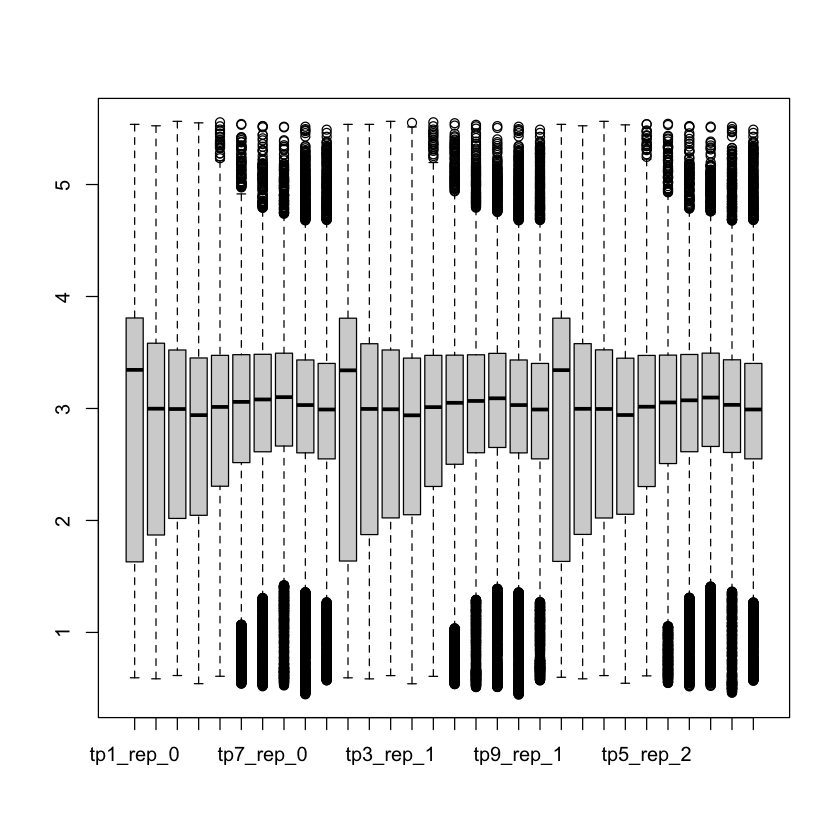

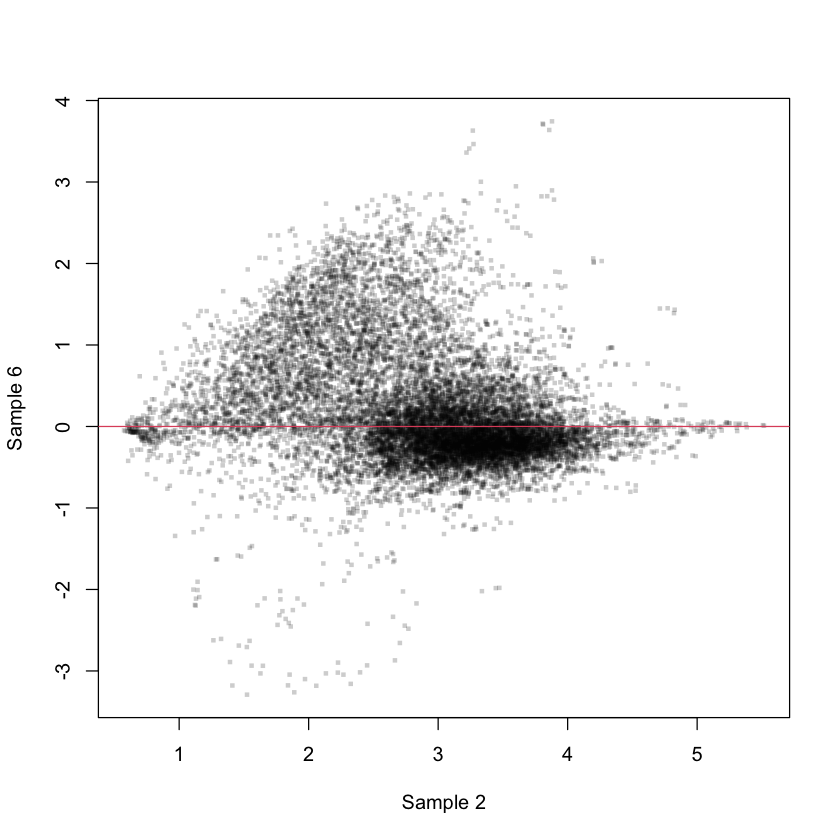

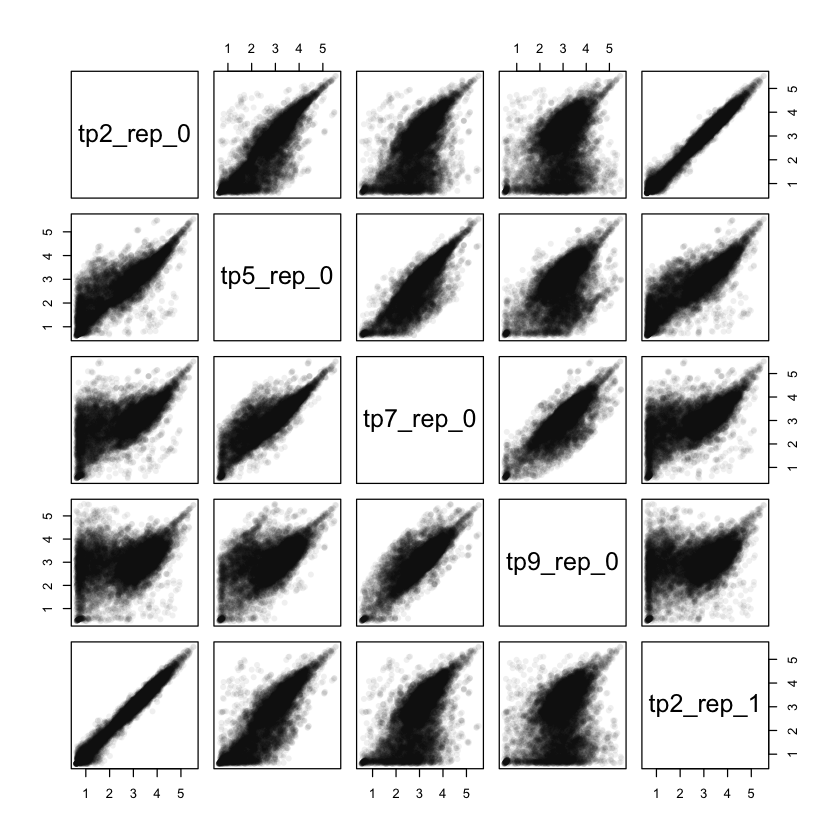

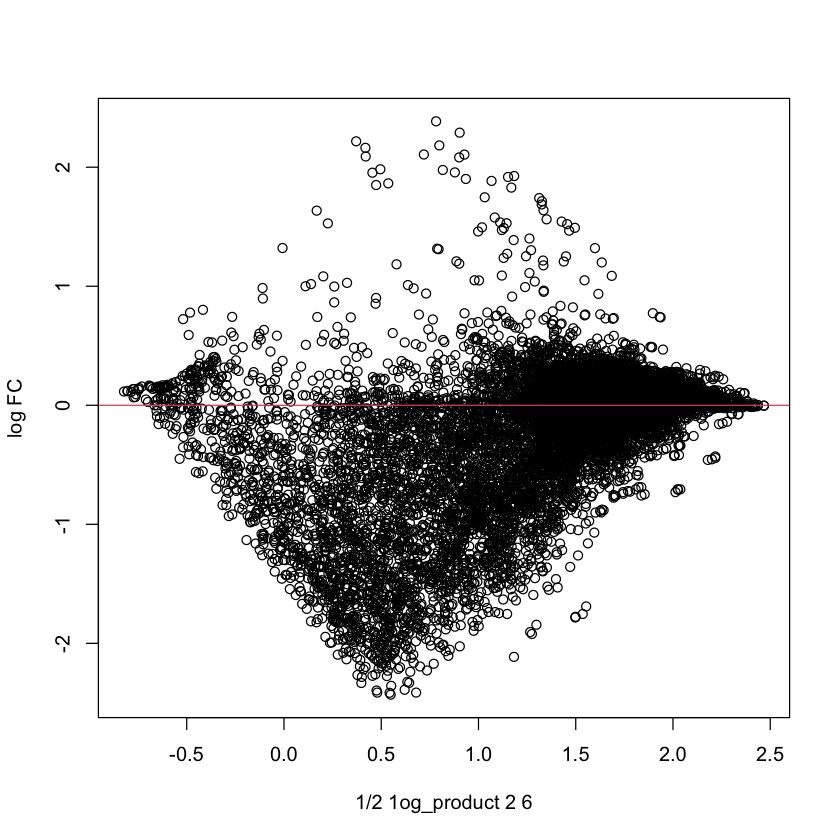

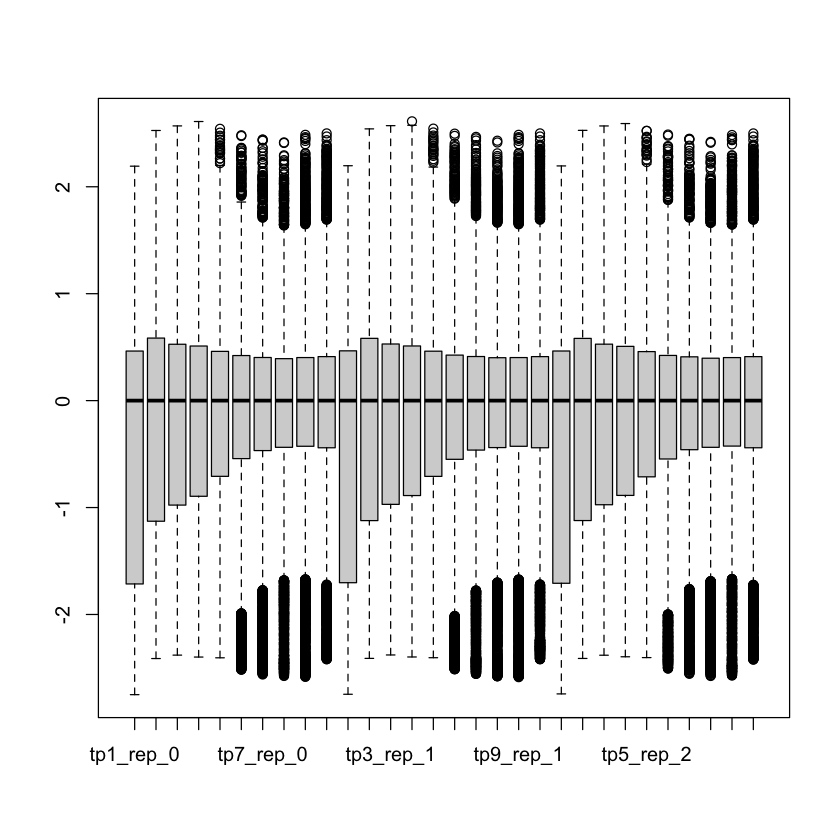

ERROR: Error in normalize.quantiles(microarray): 没有"normalize.quantiles"这个函数


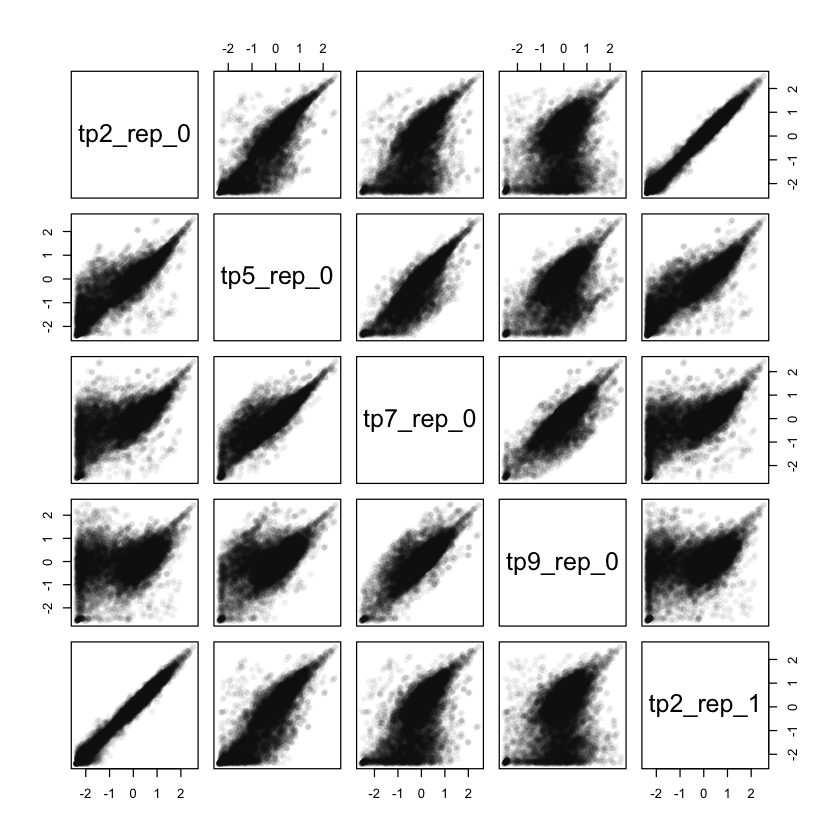

In [27]:
microarray <- as.matrix(me_Kalinka[,2:ncol(me_Kalinka)])

#boxplot
boxplot(microarray)
log_data <- log2(microarray)

sample1 <- 2
sample2 <- 6

plot(rowMeans(microarray,na.rm=T),microarray[,sample2]-microarray[,sample1],cex=0.5,pch=15, col="#00000033", 
     xlab=paste("Sample",sample1), ylab=paste("Sample",sample2))
abline(h=0,col=2)

# Scatter plots
pairs(microarray[, c(2, 5, 7, 9, 12)], pch=16, col="#00000010")

# MA plot 2
plot ((log_data[, sample1]+log_data[, sample2])/2, log_data[, sample1]-log_data[, sample2],
xlab=paste ("1/2 log_product", sample1, sample2), ylab="log FC")
abline(h=0, col=2)
                  
# median normalization
NormalizedData <- t(t(microarray) - colMedians(microarray,na.rm=T))          
# plot again
boxplot(NormalizedData)
pairs(NormalizedData[, c (2, 5, 7, 9, 12) ], pch=16, col="#00000010")

# quantile normalization
quant_data <- normalize.quantiles(microarray)
boxplot(quant_data)
pairs(quant_data[, c(2, 5, 7, 9, 12)], pch=16, col="#00000010")

##### Question I:  <u>Can you spot the difference between the developmental states from the boxplot?</u>

_the value range is gradully shrinking from timepoint 1 to 10, and all replicates behave similarly._

##### Question II:  <u>What complicates normalization of such a data set with large differences?</u>

_The complex nature of sampling objects. The technique errors produced form processing procedures and analysis equipments._


##### Question III:  <u>What are the sometimes rather drastic changes in the data when using quantile normalization?</u>

_When there are rather big differences among samples, this method might introduce significant change only on some specific values._


##### Question IV:  <u>Which normalization would you recommend?</u>

_It depends. For this dataset, I think it has already somewhat been normalized and no additional methods need to be applied._



### Exercise 5

In this exercise, you will apply statistical tests to proteomics data.

Carry out t-tests between the two cancer subtypes of the ```CanceriTRAQ``` data (from https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0137048). Plot the p-values (corrected for multiple testing) in a volcano plot and compare the results to the ones in the _IsoProt_ paper (https://pubs.acs.org/doi/10.1021/acs.jproteome.8b00968)

Compare the results for the two types of correction for multiple testing "Benjamini-Hochberg" and the ```qvalue``` library ("Storey" method). You can make a scatter plot of the FDRs (corrected p-values) on log-scale and also compare by making two volcano plots.


,Sample.1.NI.Sample1,Sample.2.NI.Sample1,Sample.3.d3.Sample1,Sample.4.d3.Sample1,Sample.5.ECM.Sample1,Sample.6.ECM.Sample1,Sample.1.ECM.Sample2,Sample.2.ECM.Sample2,Sample.3.NI.Sample2,Sample.4.NI.Sample2,Sample.5.d3.Sample2,Sample.6.d3.Sample2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"A2BIM8, B5X0G2, P02762, P04938, P04939, P11589",-0.241506171,0.03959083,-0.25210960,0.13829213,0.10685765,0.208875163,-0.587519956,0.75388647,-0.06748884,-0.105678818,-0.09239498,0.09919612
"A2BIM8, B5X0G2, P02762, P04938, P11588",0.759191178,0.43491715,0.09647712,0.62187844,-0.56548508,-1.346978806,-1.286407376,-0.69466386,1.30191684,0.026209468,-0.62140890,1.27435383
"A2BIM8, B5X0G2, P02762, P04938, P11588, P11589",0.490953014,0.39147959,0.06609399,0.60353259,-0.54792340,-1.004135788,-1.124841901,0.34310839,0.94006352,-0.022715688,-0.58522457,0.44961025
A6X935,0.433346508,-0.10038903,-0.12820220,-0.06370189,-0.25436482,0.113311419,0.116435031,0.07860939,-0.20549663,0.128932747,-0.03257292,-0.08590762
"B2RSH2, P08752, P18872, P20612, P27600, P27601, P50149, P63094, Q3V3I2, Q6R0H7, Q8CGK7, Q9DC51",-0.018359490,-0.17251581,-0.32081006,-0.28163515,0.43082703,0.362493493,-0.382761999,1.41828527,1.41981201,-0.188232591,-1.62426843,-0.64283425
E9PV24,0.164582962,-0.10451419,-0.34219281,0.01439906,0.02009986,0.247625122,-0.187940927,-0.53465232,0.92683731,0.342999963,-0.27967117,-0.26757286
E9Q414,0.134502275,-0.01322257,0.01026332,0.17324121,-0.12105928,-0.183724948,-0.137359740,-0.62361289,0.21204461,0.283842879,0.19492944,0.07015570
O08677,0.288383921,0.07361670,-0.02078041,0.09243053,-0.37900908,-0.054641652,-0.003568881,-0.58473959,0.17541997,0.121825685,0.30654367,-0.01548086
"O35963, P35276, P35279, P35283, P55258, P56371, P61027, P61028, P61294, P62821, P62823, P63011, Q504M8, Q5RI75, Q64008, Q6PHN9, Q8BHC1, Q8BHD0, Q8BHH2, Q8CB87, Q8CG50, Q8K386, Q91V41, Q91ZR1, Q923S9, Q99P58, Q9CZT8, Q9D1G1, Q9ERI2, Q9JKM7",-0.081343084,-0.06165823,-0.21577906,-0.28371525,0.31850418,0.323991444,-0.082817260,0.99768870,-0.32829176,-0.173436482,-0.39480527,-0.01833792


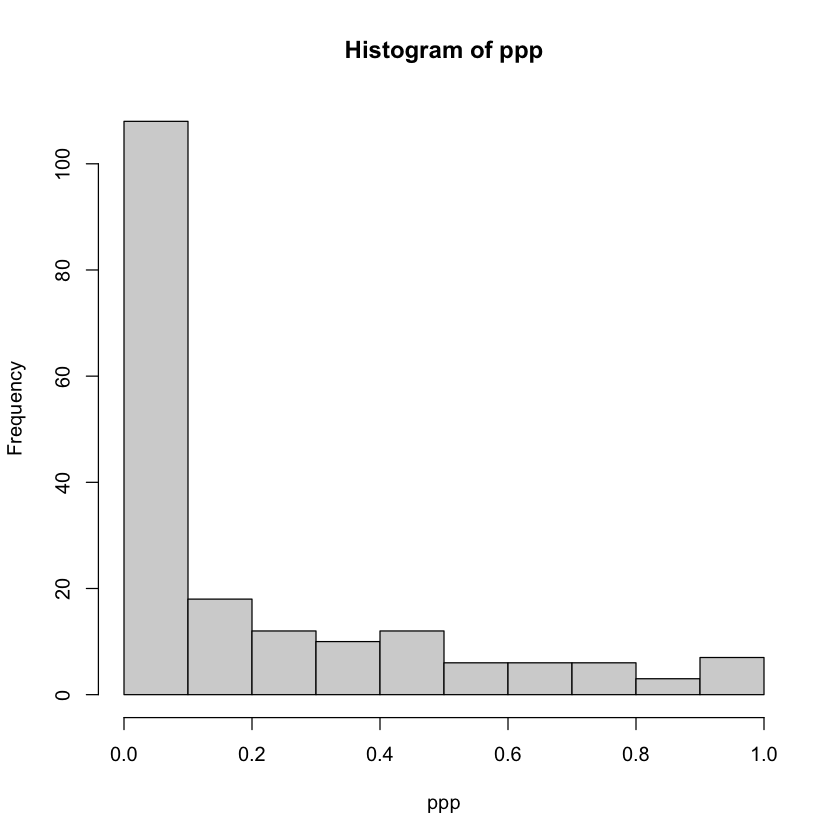

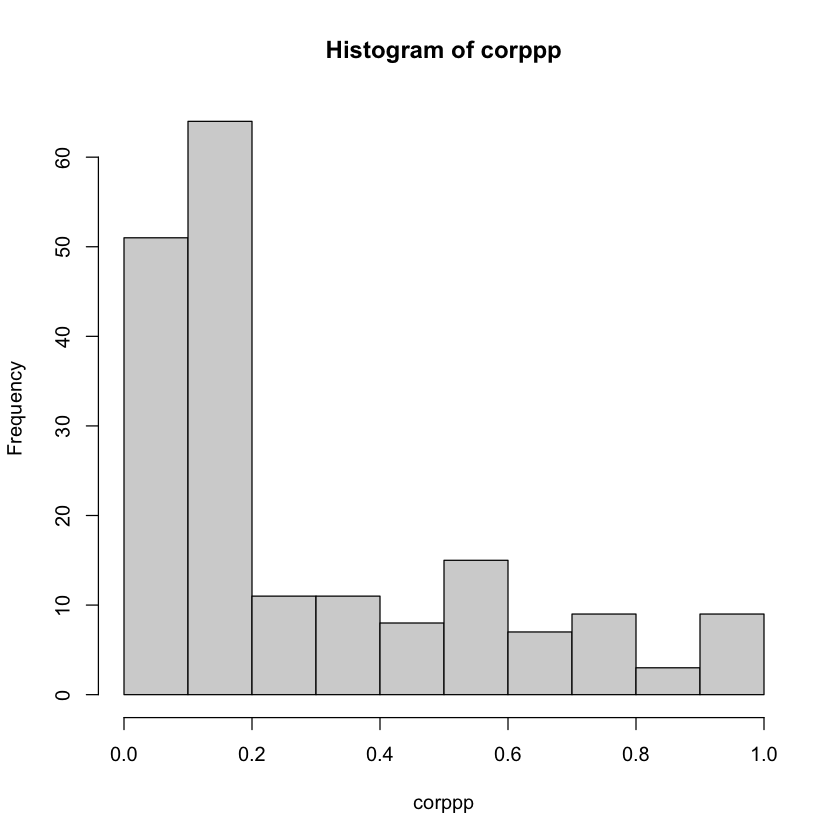

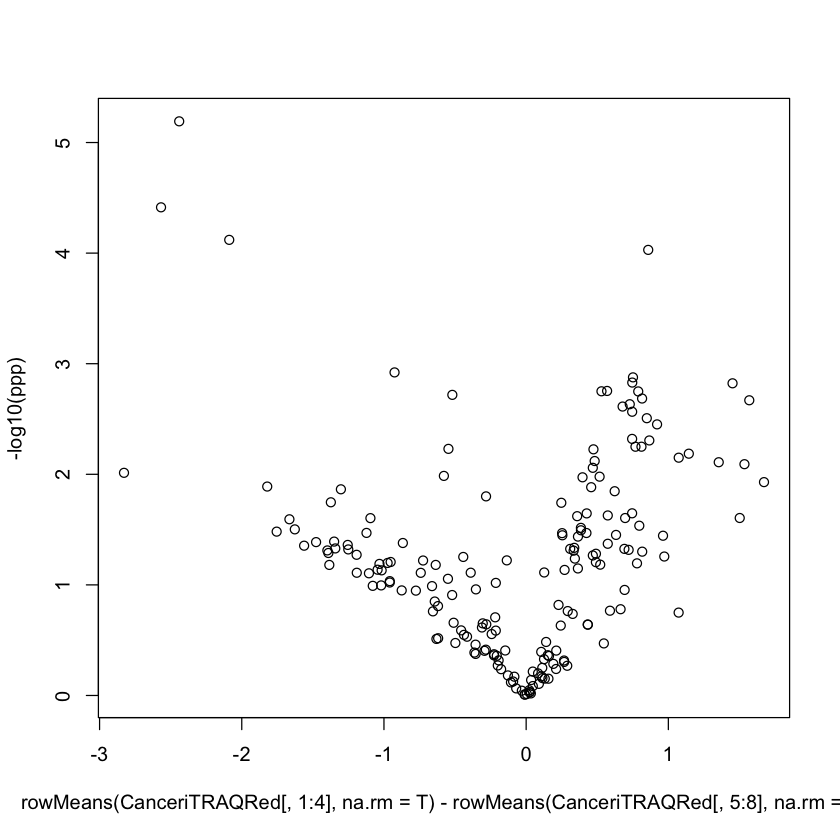

[1] 77

[1] 108

[1] 27

[1] 51

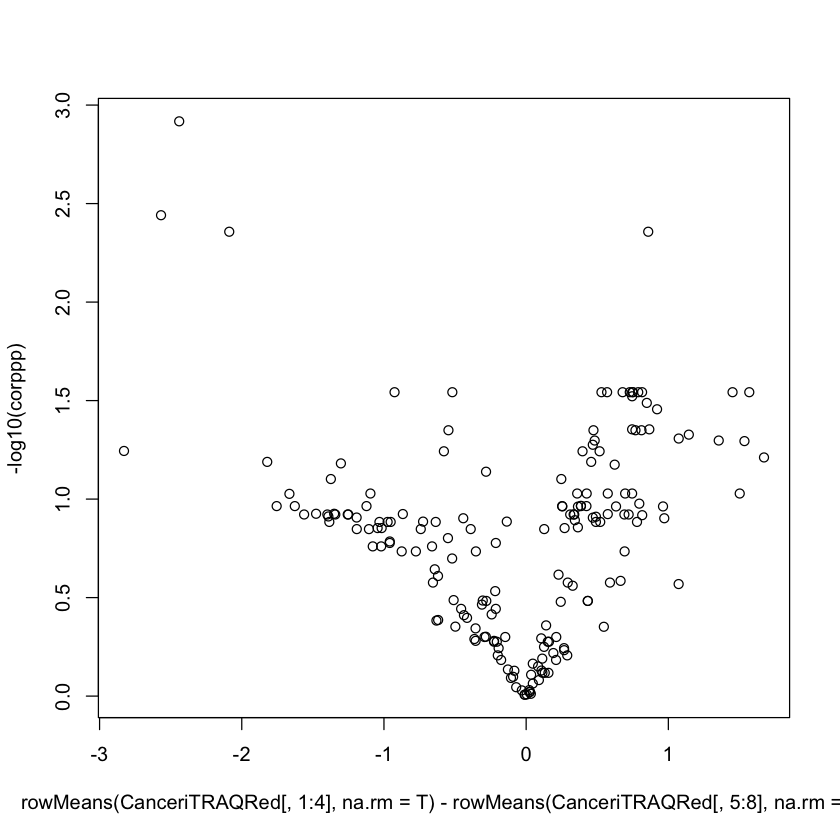

In [28]:
CanceriTRAQRed <- CanceriTRAQ[rowSums(is.na(CanceriTRAQ))<3,]
# Add your code here:
CanceriTRAQRed 

g_1 <- as.matrix(CanceriTRAQRed [,1:4])
g_2 <- as.matrix(CanceriTRAQRed [,5:8])

#use s.test
ppp <- vector(,nrow(CanceriTRAQRed))
for (i in 1:nrow(CanceriTRAQRed)){
    ppp[i] <- t.test(g_1[i,],g_2[i,])$p.value
}
hist(ppp)

corppp <- p.adjust(ppp,method="BH")

hist(corppp)

plot(rowMeans(CanceriTRAQRed[,1:4],na.rm = T) - rowMeans(CanceriTRAQRed[,5:8],na.rm = T),-log10(ppp))
plot(rowMeans(CanceriTRAQRed[,1:4],na.rm = T) - rowMeans(CanceriTRAQRed[,5:8],na.rm = T), -log10(corppp))
sum(ppp < 0.05)
sum(ppp < 0.1)
sum(corppp < 0.05)
sum(corppp < 0.1)

##### Question I:  <u>What does the first line of code do?</u>

_remove the row if missing value is up to 3._

##### Question II:  <u>How many p-values <0.05 and 0.1 do you get? How many after correction for multiple testing?</u>

_42 and 101; 0 and 0._

##### Question III:  <u>What would be needed to increase the number of significantly changing proteins?</u>

_pair the samples._

##### Question IV:  <u>How many p-values below 0.05 would a randomized data set of the same size give without correction for multiple testing?</u>

_size * 0.05_

##### Question V:  <u>Name the difference you observe when comparing the two methods ("Benjamini-Hochberg" and "Storey")</u>

_BH: First, the P values are sorted from small to large to generate sequential numbers. In addition, it is necessary to ensure that the order of P values of all tests after correction does not change.  
Storey: more advanced FDR corrections have been developed and Storey corrections are considered a way to strike a balance between real testing and error reduction testing._



### Exercise 6

The ```limma``` package provides better estimates of the p-values by adjusting the observed variances of the features to the generally observed trends in the data. We will further use different tools for biological interpretation.

Carry out limma testing on the cancer data and compare the results to the ones from the t-tests.

Take the 50 most regulated proteins and upload them to the following two web services for biological interpretation:

- DAVID: http://david.ncifcrf.gov
- GOrilla http://cbl-gorilla.cs.technion.ac.il/



In [1]:
View(CanceriTRAQ)

ERROR: Error in repr::mime2repr[[mime]](obj): 找不到对象'CanceriTRAQ'


In [29]:
## limma
# Set replicate numbers
Reps <- c(1,1,1,1,2,2,2,2)
Data <- CanceriTRAQ
# Make a matrix and determine the control and treat group
NumCond <- max(Reps)
  design <- model.matrix(~0+factor(Reps-1))
  colnames(design)<-paste("i",c(1:NumCond),sep="")
  contrasts<-NULL
  First <- 1
  for (i in (1:NumCond)[-First]) contrasts<-append(contrasts,paste(colnames(design)[i],"-",colnames(design)[First],sep=""))
  contrast.matrix<-makeContrasts(contrasts=contrasts,levels=design)
  print(dim(Data))
  # Fit linear model for each protein
  lm.fitted <- lmFit(Data,design)
  # Given a linear model fit, compute estimated coefficients and standard errors for a given set of contrasts.
  lm.contr <- contrasts.fit(lm.fitted,contrast.matrix)
  # Compute moderated -statistics and log-odds of differential expression by empirical Bayes moderation
  lm.bayes<-eBayes(lm.contr)
  # topTable(lm.bayes)
  most_regulated_proteins<-topTable(lm.bayes, adjust='BH', number=50)
  most_regulated_proteins
  write.csv(most_regulated_proteins, "most_regulated_proteins_fdr.csv")

# These are the (uncorrected) p-values from the moderated t-test from the limma package:
plvalues <- lm.bayes$p.value
head(sort(p.adjust(plvalues, method="BH")))



[1] 324  12


ERROR: Error in lmFit(Data, design): row dimension of design doesn't match column dimension of data object


In [7]:
most_regulated_proteins

ERROR: Error in eval(expr, envir, enclos): 找不到对象'most_regulated_proteins'


##### Question I:  <u>How many regulated proteins do you find this time (FDR < 0.05)?</u>

_we only found two significantly regulated proteins, P15428 and Q43175/Q13363._

##### Question II:  <u>Which are the most enriched Gene ontology terms (GO terms, BP) in both web sites?</u>

_In DAVID, the most enriched GO terms are flavonoid glucuronidation and xenobiotic glucuronidation.  
In GOrilla, the most enriched GO terms are xenobiotic metabolic process and xenobiotic glucuronidation._

##### Question III:  <u>Which pathways are likely to distinguish the two cancer subtypes?</u>

_Xenobiotic glucuronidation and flavonoid glucuronidation are likely to distinguish the two cancer subtypes, because the most regulated proteins are enriched in these terms._
